## 0. 背景知識

每一種作物，或同種作物的不同品系間對養分的需求可能不同。

而氮、磷和鉀之所稱為肥料三要素，主要是因它們都是每一種作物生長中需要量較多的三種要素，其個別的功能，可簡單地描述如下：

---

* 氮肥(俗稱葉肥)：
    * 長葉子及製造葉綠素，供光合作用產生碳水化合物，因此可增進作物的產量。
    * 適用在長葉子的生長期和以葉部為食用(如蔬菜)或觀賞(如草皮，觀葉植物)為主的作物。
    * pH值為7~8的偏鹼性土壤，應注意深施氮肥，防止其揮發造成損失。
    * 高雨水，應降低氮肥供應。

---

* 磷肥(俗稱花肥及果肥)：
    * 主要的功能在能量的製造和運移，對開花及結果影響很大。
    * 適用在開花時期或以觀花為主的花卉。
    * 磷的有效性容易受土壤酸鹼度的影響，當pH值為6~7.5時，其有效性較高。
    * 土壤溫度低時，作物吸收率大減，應提升磷肥供應。

---

* 鉀肥(俗稱果肥及莖幹肥)：
    * 維持細胞內電解質平衡與細胞膨壓，為蛋白質合成及五十多種酵素催化作用所必需。
    * 適用在結果的時期以及以果實收成為主的作物，
    * 具有使莖幹強健，增進作物抗病、抗蟲及抗環境逆境(如霜害、旱害、風害……等)的功能。
    * pH為6以下的偏酸性土壤，鉀元素容易被氫離子置換而隨水流失，應注意補充。
    * 降雨浸水時根的吸收率低，應提升鉀肥供應。

---

參考資料：

* [因應氣候條件之施肥管理](https://www.mdais.gov.tw/files/mdais/web_structure/5921/A01_1.pdf)
* [農業知識入口網 何謂氮磷鉀肥?](https://kmweb.coa.gov.tw/knowledge_view.php?id=7995) 

## 1. 讀入資料 

In [2]:
import pandas as pd
df = pd.read_csv("Crop.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## 2. 各類作物的資料筆數

* 蘋果 (apple)          
* 香蕉 (banana)         
* 黑吉豆 (blackgram，黑綠豆)
* 鷹嘴豆 (chickpea)
* 咖啡 (coffee)
* 椰子 (coconut)     
* 棉花 (cotton)         
* 葡萄 (grapes)         
* 黃麻 (jute)           
* 腰豆 (kidneybeans)
* 扁豆 (lentil)         
* 玉米 (maize)          
* 芒果 (mango)          
* 蛾豆 (mothbeans)      
* 綠豆 (mungbean)
* 香瓜 (muskmelon)      
* 橘子 (orange)         
* 木瓜 (papaya)         
* 木豆 (pigeonpeas)
* 石榴 (pomegranate)    
* 米 (rice)           
* 西瓜 (watermelon)     

共有 22 種作物，每種都是 100 筆

In [3]:
df.groupby(['label']).size()

label
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
dtype: int64

## 3. 從作物土壤的氮、磷、鉀含量著手進行分析 

### 3.1 計算每種作物的平均土壤氮、磷、鉀含量 (存成 dict)

In [4]:
npk = {}
for i in df.groupby(['label']):
    N = df.groupby(['label']).get_group(i[0])['N'].sum()/100
    P = df.groupby(['label']).get_group(i[0])['P'].sum()/100
    K = df.groupby(['label']).get_group(i[0])['K'].sum()/100
    npk[i[0]] = {}
    npk[i[0]]['N'] = N
    npk[i[0]]['P'] = P
    npk[i[0]]['K'] = K
npk

{'apple': {'N': 20.8, 'P': 134.22, 'K': 199.89},
 'banana': {'N': 100.23, 'P': 82.01, 'K': 50.05},
 'blackgram': {'N': 40.02, 'P': 67.47, 'K': 19.24},
 'chickpea': {'N': 40.09, 'P': 67.79, 'K': 79.92},
 'coconut': {'N': 21.98, 'P': 16.93, 'K': 30.59},
 'coffee': {'N': 101.2, 'P': 28.74, 'K': 29.94},
 'cotton': {'N': 117.77, 'P': 46.24, 'K': 19.56},
 'grapes': {'N': 23.18, 'P': 132.53, 'K': 200.11},
 'jute': {'N': 78.4, 'P': 46.86, 'K': 39.99},
 'kidneybeans': {'N': 20.75, 'P': 67.54, 'K': 20.05},
 'lentil': {'N': 18.77, 'P': 68.36, 'K': 19.41},
 'maize': {'N': 77.76, 'P': 48.44, 'K': 19.79},
 'mango': {'N': 20.07, 'P': 27.18, 'K': 29.92},
 'mothbeans': {'N': 21.44, 'P': 48.01, 'K': 20.23},
 'mungbean': {'N': 20.99, 'P': 47.28, 'K': 19.87},
 'muskmelon': {'N': 100.32, 'P': 17.72, 'K': 50.08},
 'orange': {'N': 19.58, 'P': 16.55, 'K': 10.01},
 'papaya': {'N': 49.88, 'P': 59.05, 'K': 50.04},
 'pigeonpeas': {'N': 20.73, 'P': 67.73, 'K': 20.29},
 'pomegranate': {'N': 18.87, 'P': 18.75, 'K': 

### 3.2 轉換成 DataFrame

In [6]:
df_npk = pd.DataFrame(npk)
df_npk

,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
N,20.80,100.23,40.02,40.09,21.98,101.20,117.77,23.18,78.40,20.75,...,20.07,21.44,20.99,100.32,19.58,49.88,20.73,18.87,79.89,99.42
P,134.22,82.01,67.47,67.79,16.93,28.74,46.24,132.53,46.86,67.54,...,27.18,48.01,47.28,17.72,16.55,59.05,67.73,18.75,47.58,17.00
K,199.89,50.05,19.24,79.92,30.59,29.94,19.56,200.11,39.99,20.05,...,29.92,20.23,19.87,50.08,10.01,50.04,20.29,40.21,39.87,50.22


### 3.3 將作物分成3群 (豆類、水果、其他)

* 豆類: blackgram、chickpea、coffee、kidneybeans、lentil、mothbeans、mungbean、pigeonpeas
* 水果: apple、banana、mango、watermelon、grapes、orange、papaya、coconut、muskmelon、pomegranate
* 其他: cotton、jute、maize、rice

3.3.1 豆類

可以看出粗略分出的多數豆類對於 P 有較大的需求

![](https://i.imgur.com/gAjeGWN.png)

In [7]:
beans = ["blackgram","chickpea","coffee","kidneybeans","lentil","mothbeans","mungbean","pigeonpeas"]
df_npk[beans]

,blackgram,chickpea,coffee,kidneybeans,lentil,mothbeans,mungbean,pigeonpeas
N,40.02,40.09,101.20,20.75,18.77,21.44,20.99,20.73
P,67.47,67.79,28.74,67.54,68.36,48.01,47.28,67.73
K,19.24,79.92,29.94,20.05,19.41,20.23,19.87,20.29


In [8]:
fruits = ["apple","banana","mango","watermelon","grapes","orange","papaya","coconut","muskmelon","pomegranate"]
df_npk[fruits]

,apple,banana,mango,watermelon,grapes,orange,papaya,coconut,muskmelon,pomegranate
N,20.80,100.23,20.07,99.42,23.18,19.58,49.88,21.98,100.32,18.87
P,134.22,82.01,27.18,17.00,132.53,16.55,59.05,16.93,17.72,18.75
K,199.89,50.05,29.92,50.22,200.11,10.01,50.04,30.59,50.08,40.21


In [9]:
others = ["cotton","jute","maize","rice"]
df_npk[others]

,cotton,jute,maize,rice
N,117.77,78.40,77.76,79.89
P,46.24,46.86,48.44,47.58
K,19.56,39.99,19.79,39.87


In [3]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = df.drop(['label'],axis=1), df['label']
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X, y)

[Text(136.96363636363637, 199.32, 'X[6] <= 30.393\ngini = 0.955\nsamples = 2200\nvalue = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100\n100, 100, 100, 100, 100, 100, 100, 100, 100, 100\n100, 100]'),
 Text(106.52727272727273, 163.07999999999998, 'gini = 0.0\nsamples = 100\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 100, 0, 0, 0, 0, 0, 0]'),
 Text(167.4, 163.07999999999998, 'X[2] <= 65.0\ngini = 0.952\nsamples = 2100\nvalue = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100\n100, 100, 100, 100, 100, 0, 100, 100, 100, 100\n100, 100]'),
 Text(91.30909090909091, 126.83999999999999, 'X[4] <= 27.685\ngini = 0.944\nsamples = 1800\nvalue = [0, 100, 100, 0, 100, 100, 100, 0, 100, 100, 100\n100, 100, 100, 100, 0, 100, 100, 100, 100, 100\n100]'),
 Text(60.872727272727275, 90.6, 'gini = 0.0\nsamples = 100\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(121.74545454545455, 90.6, 'X[4] <= 70.815\ngini = 0.941\nsamples = 1700\nvalue = [0, 100, 100

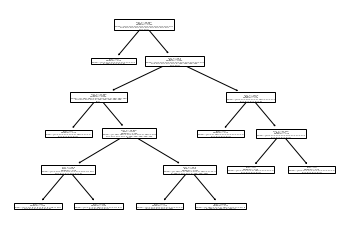

In [5]:
tree.plot_tree(clf)